# Note to the Reader

<font color='red'> The text below highlighted in red, are comments made as part of this task. Text marked in black are comments/instructions related to this task

# Task 2: Prepare and Explore the Data

# Your Task

__FROM:__ Guido Rossum <br>
__Subject:__ Working with Credit One Data<br>

Hello,
 
Now that you have created a dedicated local programming environment you're ready to begin your work by preparing and exploring the data. Before we dive in lets review some notes about the project:
 
Problem:
1. Increase in customer default rates - This is bad for Credit One since we approve the customers for loans in the first place.
2. Revenue and customer loss for clients and, eventually, loss of clients for Credit One

Investigative Questions:
1. How do you ensure that customers can/will pay their loans? Can we do this?

As you progress through the tasks at hand begin thinking about how to solve this problem. Here are some lessons we learned form a similar problem we addressed last year:

1. We cannot control customer spending habits
2. We cannot always go from what we find in our analysis to the underlying "why"
3. We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?
4. What concrete information can we derive from the data we have?
5. What proven methods can we use to uncover more information and why?
I'll be expecting a report on your experience in a few days.

 
Thanks,
 
GR
 
Guido Rossum
Senior Data Scientist
Credit One
www.creditonellc.com

# Introduction

Guido has asked you to start your analysis with a full exploration of the Credit One data. 

This task requires you to prepare an Exploratory Data Analysis report that should include the following:

Exploratory Data Analysis Report

* Jupyter Notebook format
* Hosted on GitHub
* Use of numpy, pandas, matplotlib
* Summary of your findings.
* Any observations you've made throughout your analysis.
* Any future recommendations 

Your report should be written for a Data Science audience that is concerned with what can be gleaned from the data.

The steps in the following tabs will walk you through this process.

# Import and Prepare the Data

In [12]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib as mpl
import matplotlib.pyplot as plt


In [13]:
mpl.rcParams['font.size']=14

In [10]:
path_data_file = '../C05T01_Get_Started_With_Data_Science_and_Python/default of credit card clients.csv'
path_report_folder = '.'

df = pd.read_csv(path_data_file, header = 1)

display(df.head())

display(df.describe())

display(df.info())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

None

In [11]:
print('n unique IDs',df['ID'].nunique())

n unique IDs 30000


<font color = 'red'> The dataset is composed of 30,000 rows. Based on the fact that there are an equal number of unique "ID" values as there are rows, we can see that each row is a unique credit transaction. The features and label of interest of all non-null integer values. There are 25 columns in total, 1 is the unique "ID" column, 1 is the label of interest, "default payment next month", and the other 23 columns are features we may use for prediction

# Perform Exploratory Data Analysis

<font color='red'> Setup a dictionary that specifies the unique ID (UID), feature, and label headers to more easily parse the dataframe

In [15]:
headers_dict = {'UID':'ID',
                'labels':['default payment next month']}
headers_dict['features'] = [header for header in df.columns if header != headers_dict['UID'] and header not in headers_dict['labels']]
display(headers_dict)

{'UID': 'ID',
 'labels': ['default payment next month'],
 'features': ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6']}

<font color='red'> loop through the labels and features and plot this histograms for each header

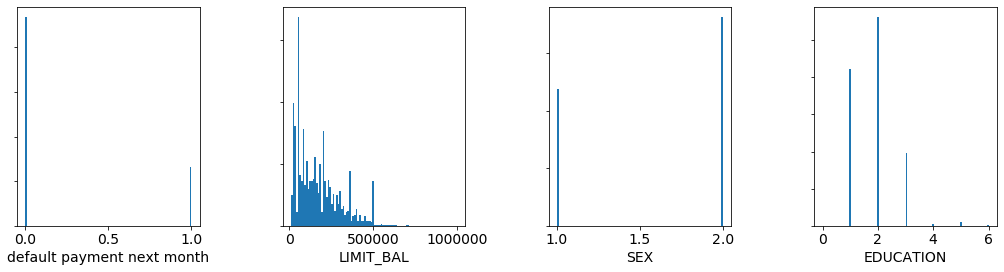

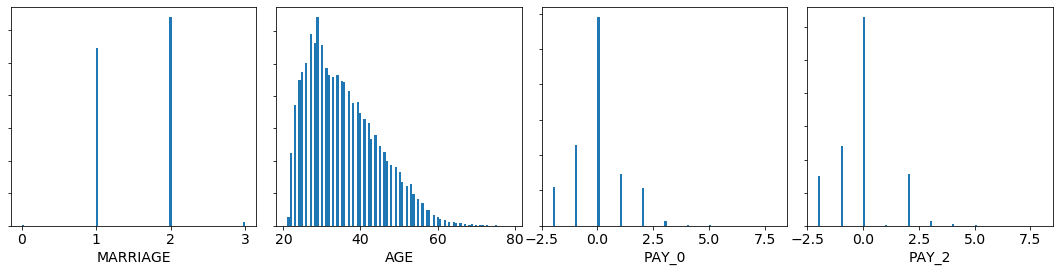

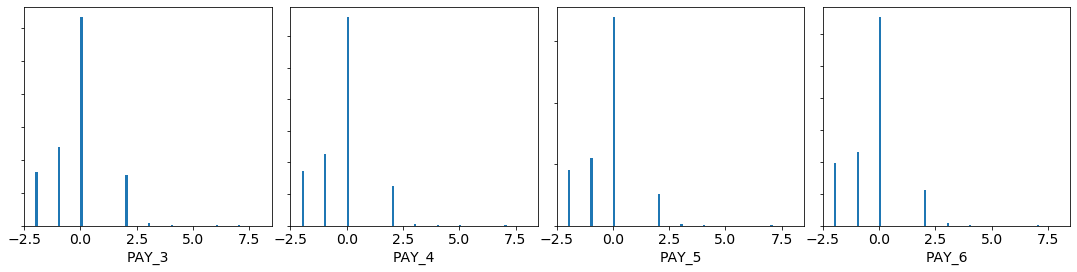

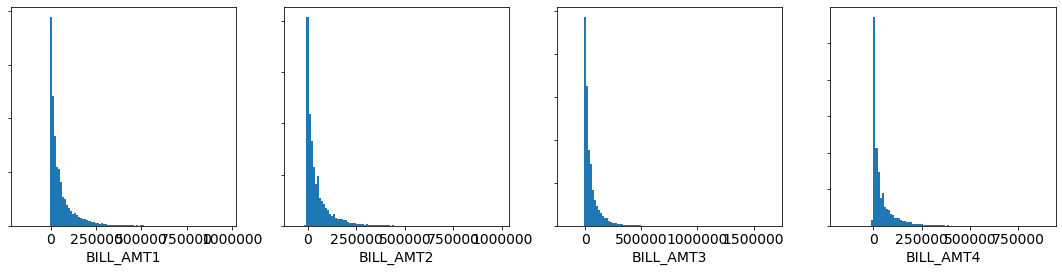

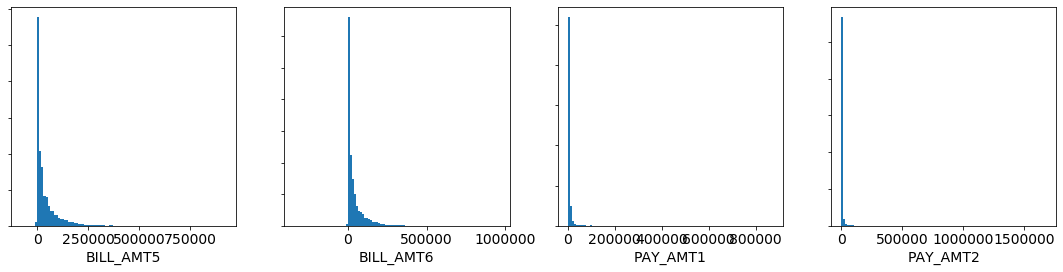

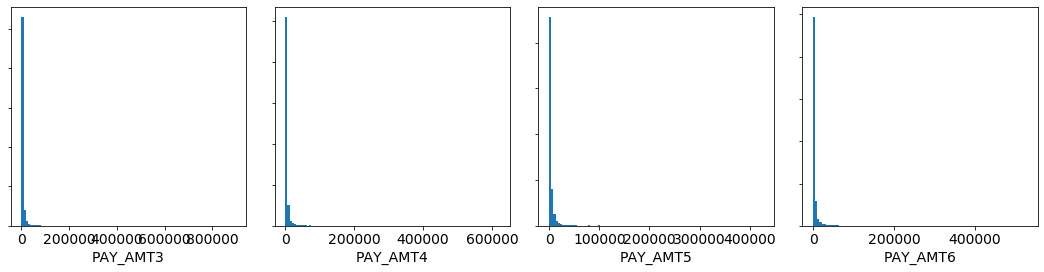

In [25]:
n_cols = 4
fig, ax_list = plt.subplots(1, n_cols)
p=0
for header in headers_dict['labels']+headers_dict['features']:

    if p >= n_cols:
        fig.tight_layout(rect=(0,0,2.5,1))
        plt.show()
        
        fig, ax_list = plt.subplots(1, n_cols)
        p=0
    
    bins = 100
    ax_list[p].hist(df[header], bins = bins)
    ax_list[p].set_xlabel(header)
    ax_list[p].set_yticklabels([],visible=False)
    
    p+=1
fig.tight_layout(rect=(0,0,2.5,1))
plt.show()    

## Scatter Plots

<font color = 'red'> the pairplot below plots the scatter plots of all the features and labels vs. each other

In [31]:
import seaborn as sns

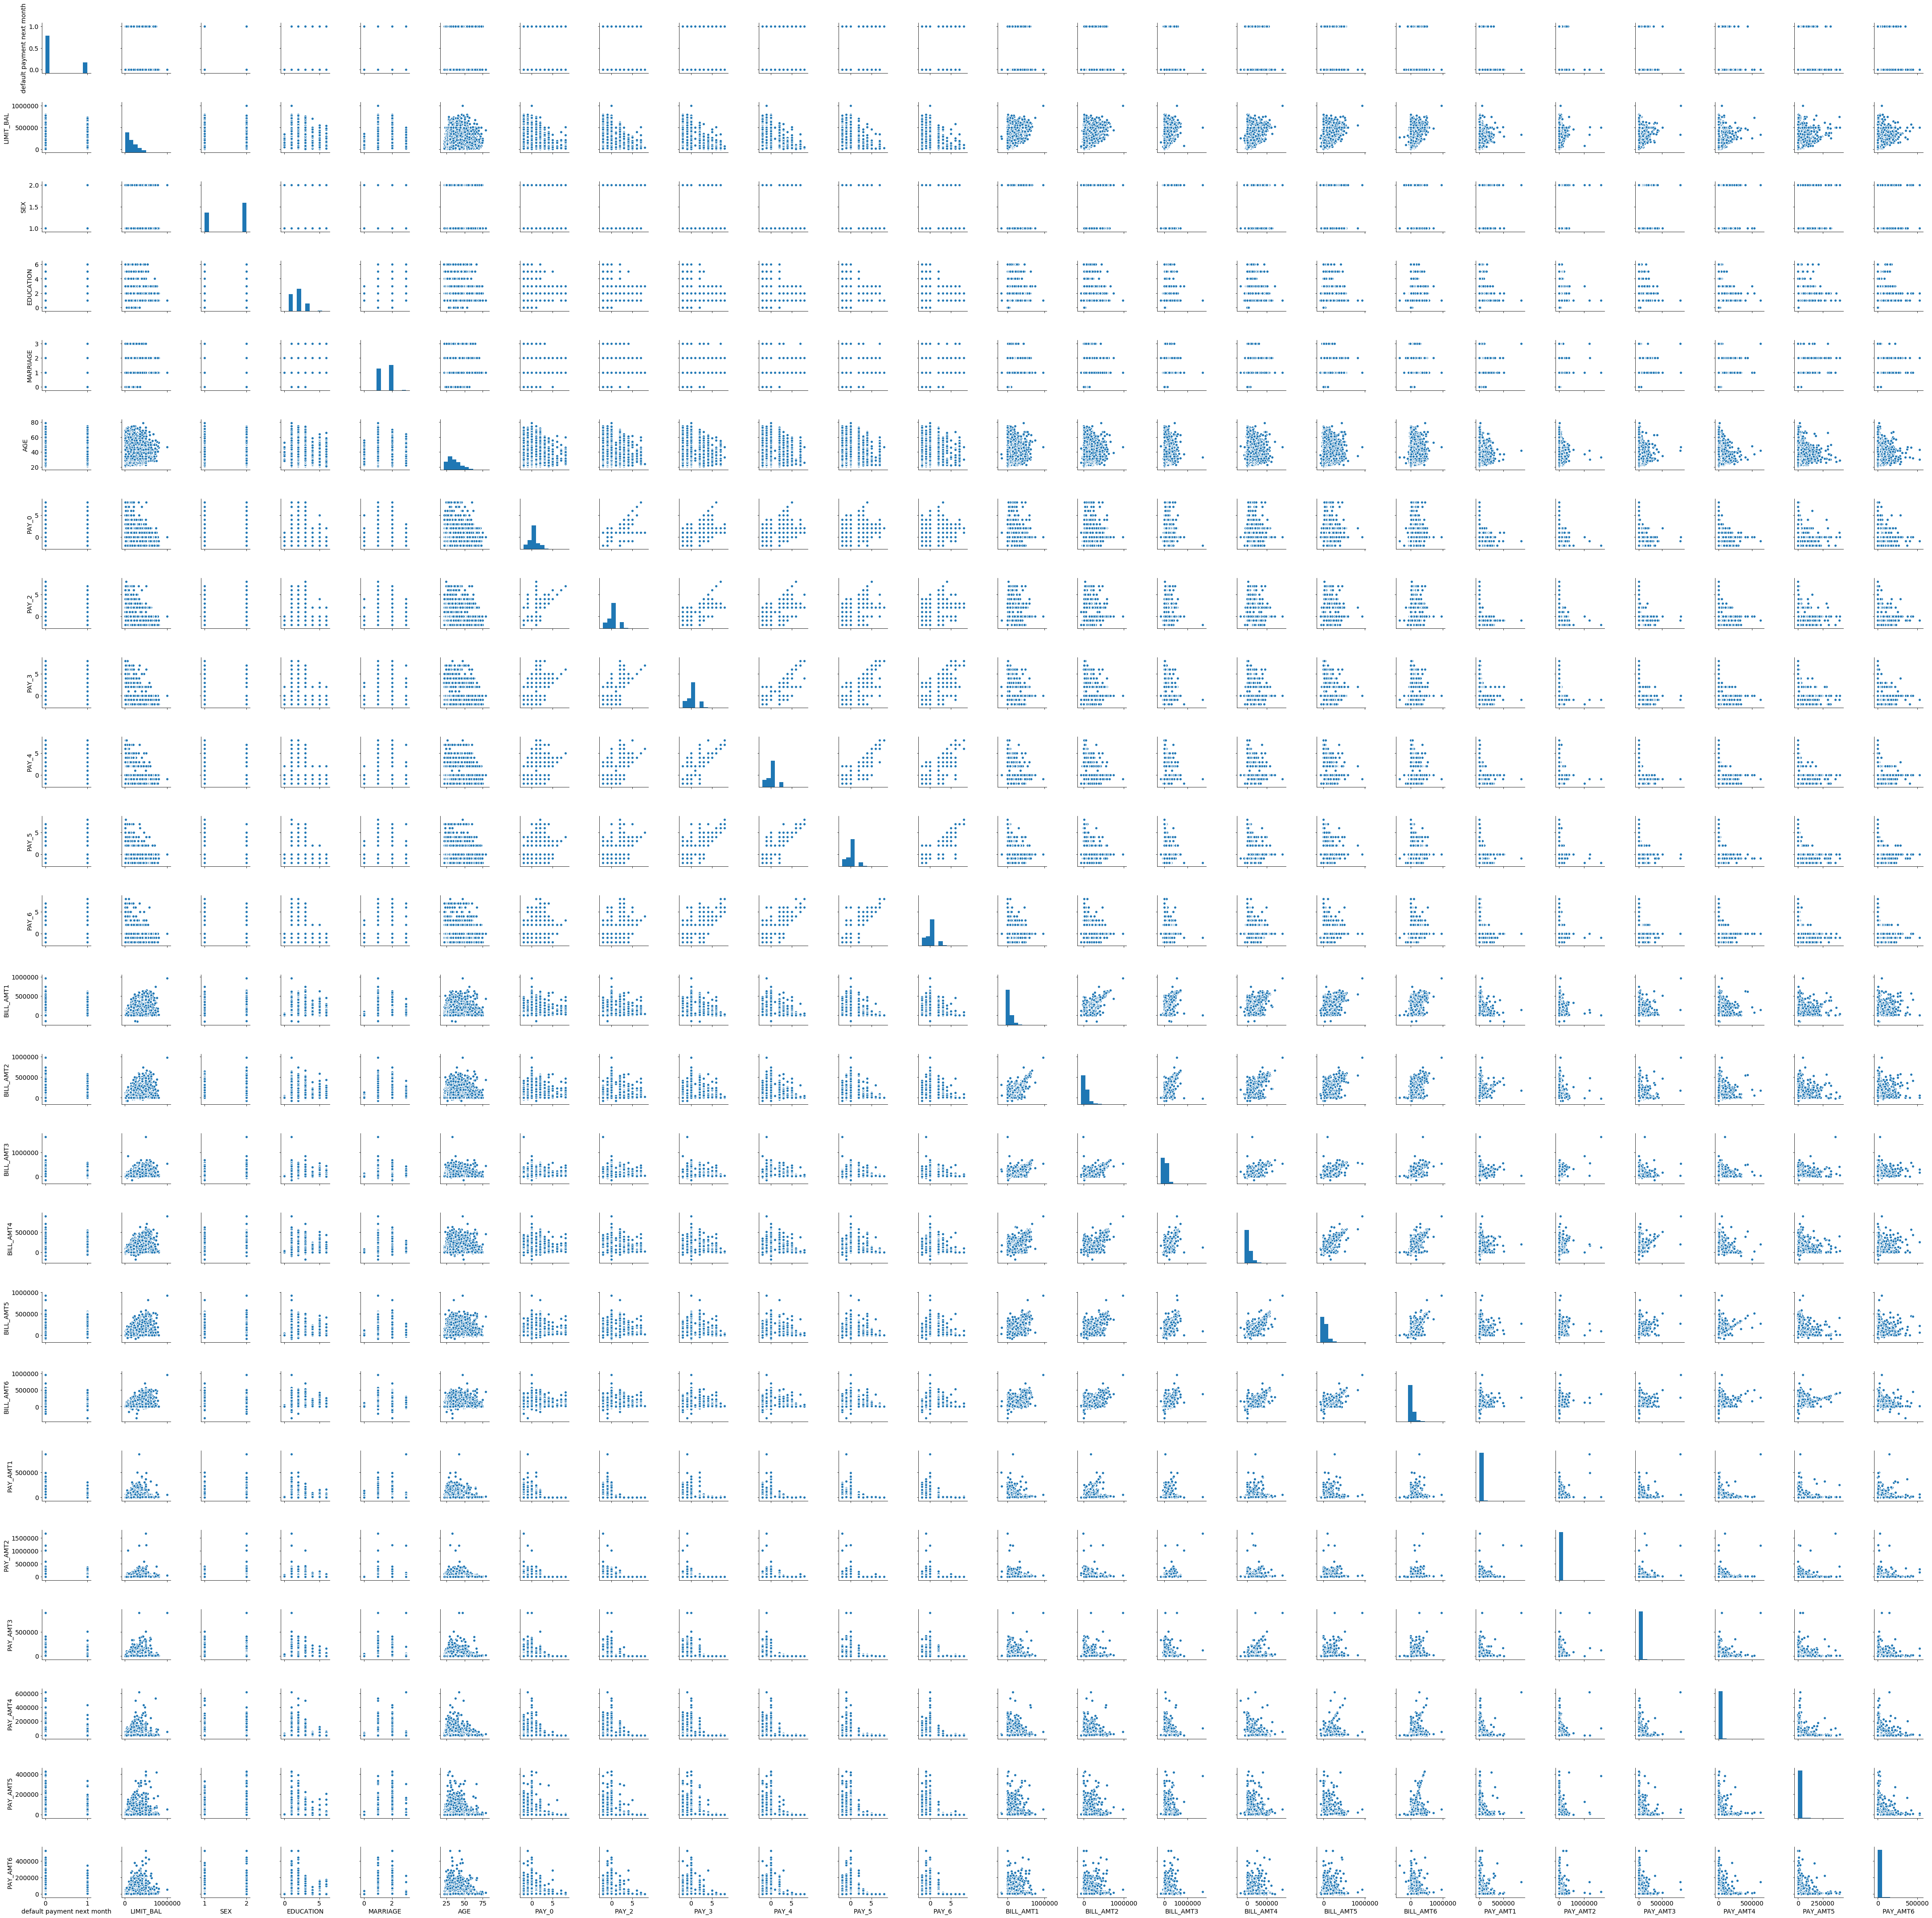

In [32]:
sns.pairplot(df[headers_dict['labels']+headers_dict['features']])

<font color = 'red'> Overall, there isn't much to see in most of the plots (not reall a strong obvious correlation), but a few of the plots seem to show some interesting trends. Below we pull out those plots of interest

In [34]:
len(headers_dict['labels']+headers_dict['features'])

24

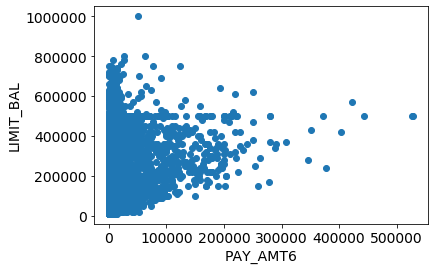

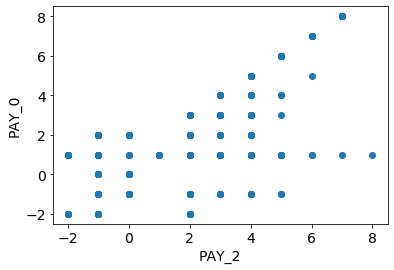

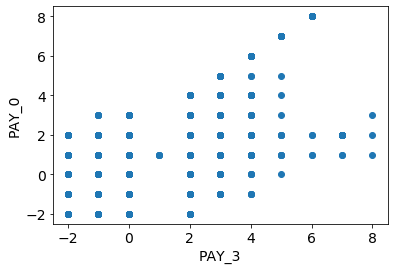

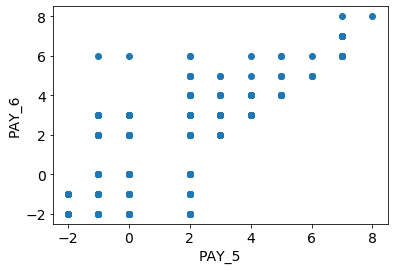

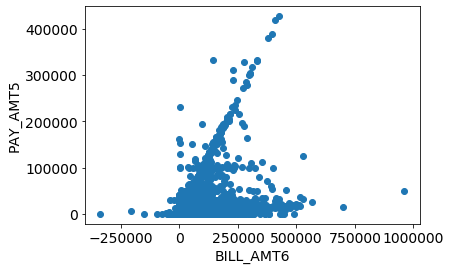

In [40]:
for x_idx, y_idx in [[23, 1],
                 [7,6],
                 [8,6],
                 [10,11],
                 [-7,-2]]:
    x_header = (headers_dict['labels']+headers_dict['features'])[x_idx]
    y_header = (headers_dict['labels']+headers_dict['features'])[y_idx]
    plt.plot(df[x_header], df[y_header], 'o')
    plt.xlabel(x_header)
    plt.ylabel(y_header)
    plt.show()
                

<font color = 'red'> in the scatter plots above, we can see there are some interesting correlations in the data, particularly in the features related to "PAY" there seem to be some strong linear correlations.

<font color = 'red'> Below, we plot some box plots for the data to inspect the stats

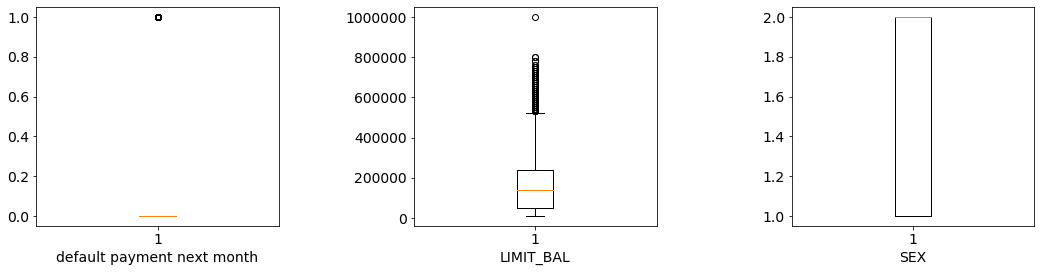

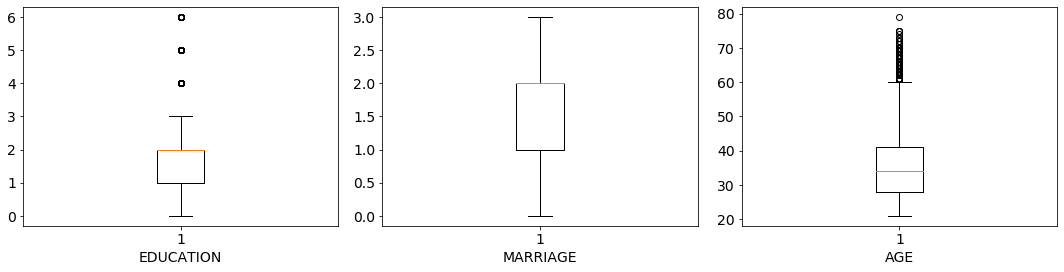

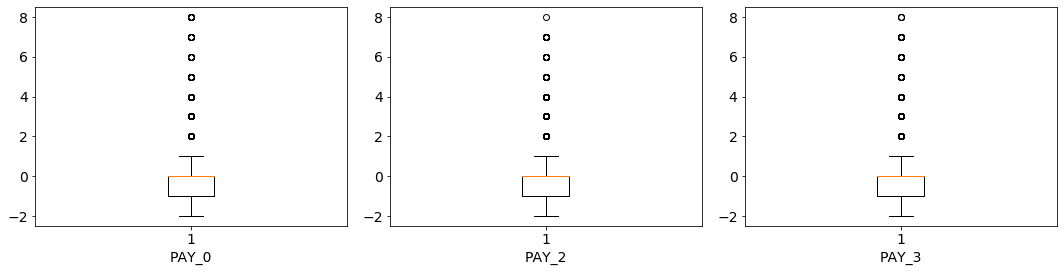

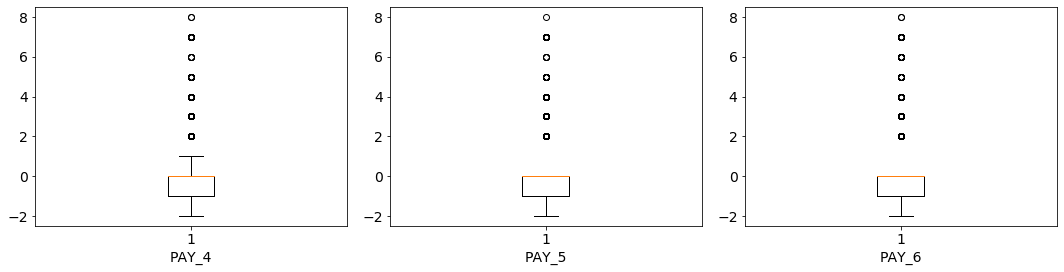

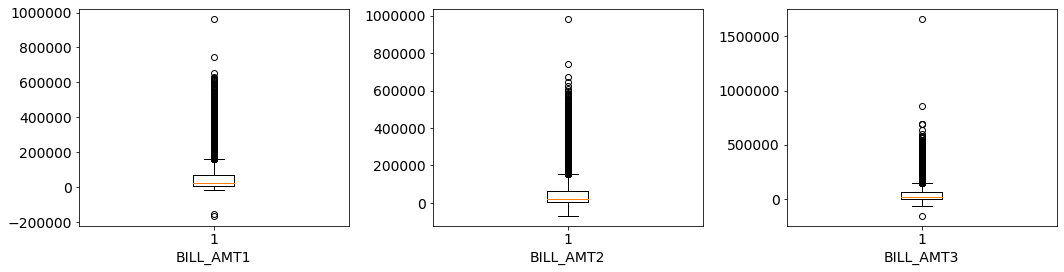

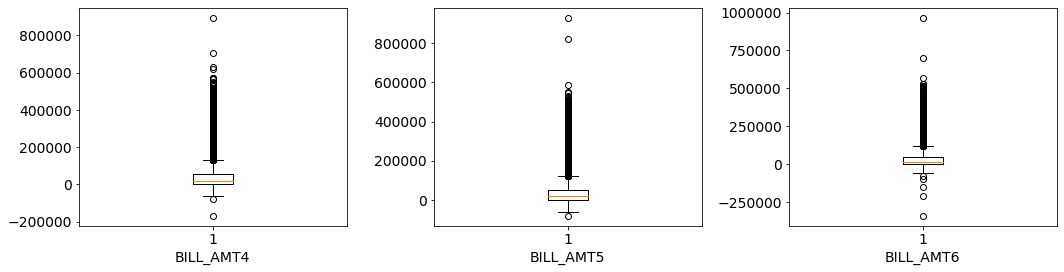

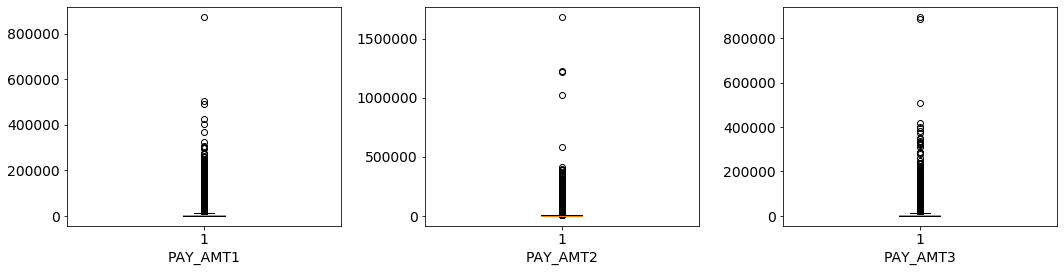

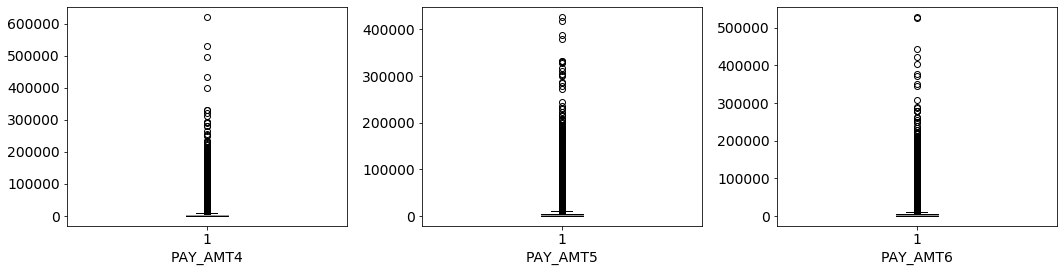

In [45]:
n_cols = 3
fig, ax_list = plt.subplots(1, n_cols)
p=0
for header in headers_dict['labels']+headers_dict['features']:

    if p >= n_cols:
        fig.tight_layout(rect=(0,0,2.5,1))
        plt.show()
        
        fig, ax_list = plt.subplots(1, n_cols)
        p=0
    
    ax_list[p].boxplot(df[header])
    ax_list[p].set_xlabel(header)
    
    p+=1
fig.tight_layout(rect=(0,0,2.5,1))
plt.show()    

## Correlations

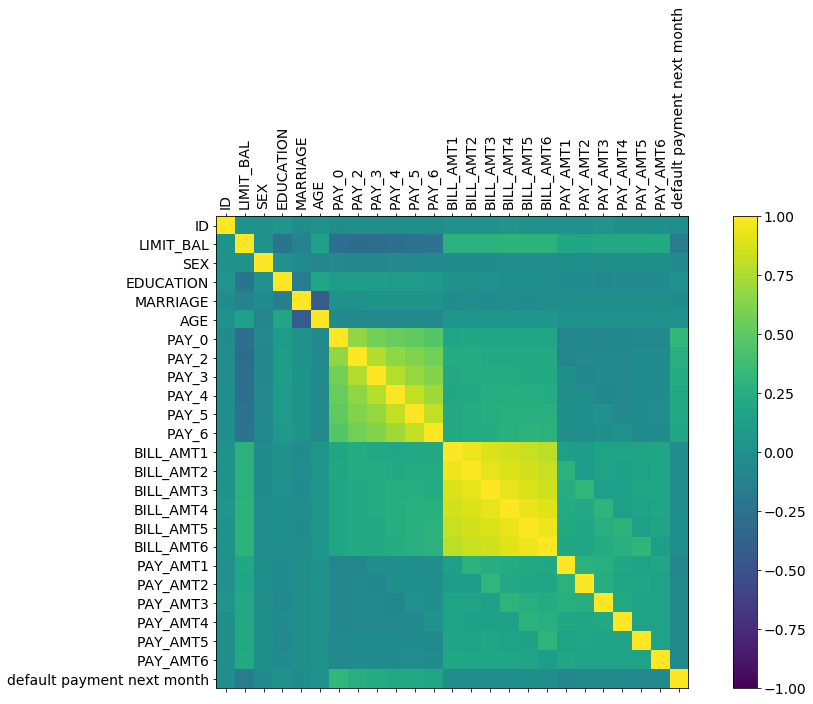

In [46]:
fig, ax = plt.subplots(1,1)
cax = ax.matshow(df.corr(),vmin=-1,vmax=1)
ax.set_xticks([i for i in range(len(df.columns))])
ax.set_xticklabels(df.columns,rotation='vertical')
ax.set_yticks([i for i in range(len(df.columns))])
ax.set_yticklabels(df.columns)
fig.colorbar(cax)

fig.tight_layout(rect=(0,0,2.5,2.5))
plt.show()

<font color='red'> the correlation matrix shown above highlights some interesting relationships between the features. Specifically, we can see that this matrix confirms our previous statement about the "PAY_#" features being strongly correlated. We can also see that the "BILL_AMT#" features are strongly correlated and generally have a more uniform correlation coefficient among each other, compared to the "PAY_#" features.
    
To gain further insight into the correlations between the label of interest and the features, let's slice out the "default payment next month" correlations and look at those in the box plot below

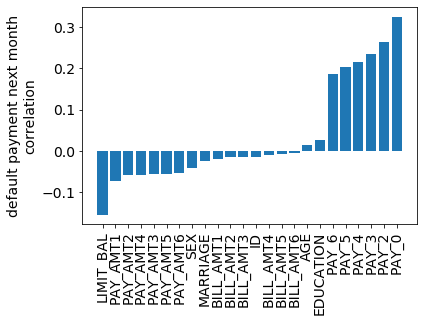

In [47]:
df_corr_for_label = df.corr()['default payment next month'].drop(index='default payment next month').sort_values()

fig, ax = plt.subplots(1,1)
ax.bar(df_corr_for_label.index, df_corr_for_label)
ax.set_xticklabels(df_corr_for_label.index, rotation = 'vertical')
ax.set_ylabel('default payment next month\ncorrelation')
plt.show()

<font color='red'> Here we can see that the "PAY_#" features have the strongest correlations with defaults, with a positive correlation coeff.

## Covariances

<font color='red'> Because our features aren't normalized/scaled, the covariance values can be drastically different in scale. To mitigate this, we can transform the data using a standard scalar on each column, where this scalar standardizes columns by removing the mean and scaling to unit variance.

In [67]:
import sklearn, sklearn.preprocessing

In [68]:
scalar = sklearn.preprocessing.StandardScaler()
scalar.fit(df)

df_scaled = pd.DataFrame(scalar.transform(df),columns = df.columns)

<font color='red'> No we're ready to look at the covariance. 

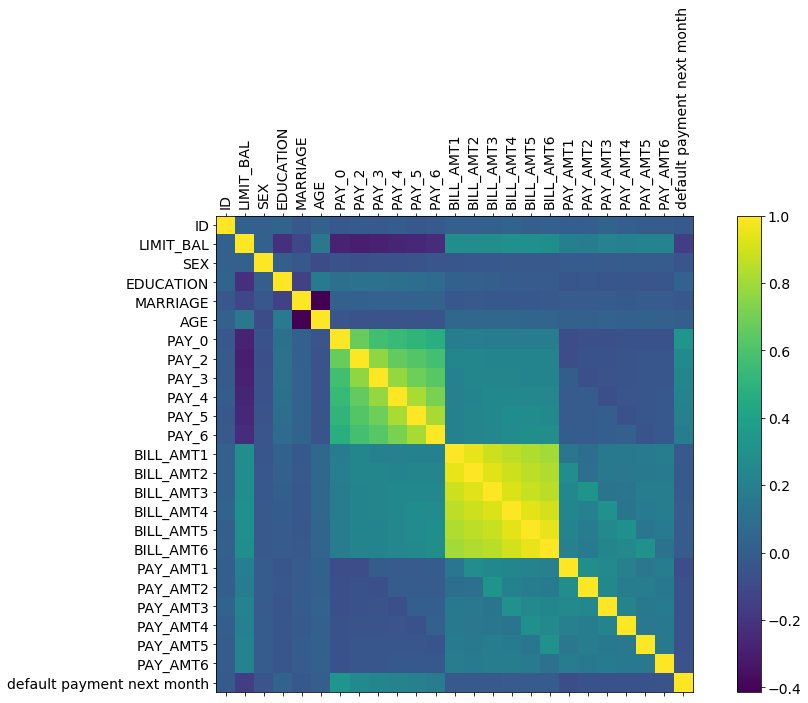

In [66]:
fig, ax = plt.subplots(1,1)
cax = ax.matshow(df_scaled.cov())
ax.set_xticks([i for i in range(len(df.columns))])
ax.set_xticklabels(df.columns,rotation='vertical')
ax.set_yticks([i for i in range(len(df.columns))])
ax.set_yticklabels(df.columns)
fig.colorbar(cax)

fig.tight_layout(rect=(0,0,2.5,2.5))
plt.show()

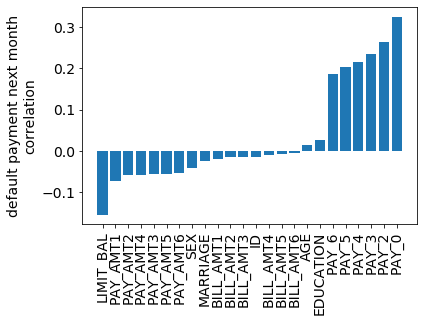

In [70]:
df_cov_for_label = df_scaled.cov()['default payment next month'].drop(index='default payment next month').sort_values()

fig, ax = plt.subplots(1,1)
ax.bar(df_cov_for_label.index, df_cov_for_label)
ax.set_xticklabels(df_cov_for_label.index, rotation = 'vertical')
ax.set_ylabel('default payment next month\ncorrelation')
plt.show()

<font color='red'> Overall, the trends look pretty similar to those observed in the correlation coefficients.